In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
pd.get_option('display.max_columns')

20

In [18]:
pd.set_option('display.max_rows', None)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [24]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [27]:
df.info(max_cols= 1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [5]:
df.drop(['eventid', 'approxdate', 'resolution', 'latitude', 'longitude' ], axis=1, inplace=True)

In [6]:
df.drop([ 'summary', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2'], axis=1, inplace=True)

In [7]:
df.drop(['natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransompaid', 'ransomamt', 'ransomamt', 'ransomamtus', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite2', 'scite3', 'related'], axis=1, inplace=True)

In [8]:
df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,nwoundte,property,ishostkid,ransom,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,0,0.0,0.0,NaN,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,...,NaN,0,1.0,1.0,NaN,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,0,0.0,0.0,NaN,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,1,0.0,0.0,NaN,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,1,0.0,0.0,NaN,PGIS,-9,-9,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 56 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   extended          181691 non-null  int64  
 4   country           181691 non-null  int64  
 5   country_txt       181691 non-null  object 
 6   region            181691 non-null  int64  
 7   region_txt        181691 non-null  object 
 8   provstate         181270 non-null  object 
 9   city              181257 non-null  object 
 10  specificity       181685 non-null  float64
 11  vicinity          181691 non-null  int64  
 12  location          55495 non-null   object 
 13  crit1             181691 non-null  int64  
 14  crit2             181691 non-null  int64  
 15  crit3             181691 non-null  int64  
 16  doubtterr         18

In [10]:
df.drop(['imonth', 'iday', 'scite1'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 53 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   extended          181691 non-null  int64  
 2   country           181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region            181691 non-null  int64  
 5   region_txt        181691 non-null  object 
 6   provstate         181270 non-null  object 
 7   city              181257 non-null  object 
 8   specificity       181685 non-null  float64
 9   vicinity          181691 non-null  int64  
 10  location          55495 non-null   object 
 11  crit1             181691 non-null  int64  
 12  crit2             181691 non-null  int64  
 13  crit3             181691 non-null  int64  
 14  doubtterr         181690 non-null  float64
 15  multiple          181690 non-null  float64
 16  success           18

<AxesSubplot:>

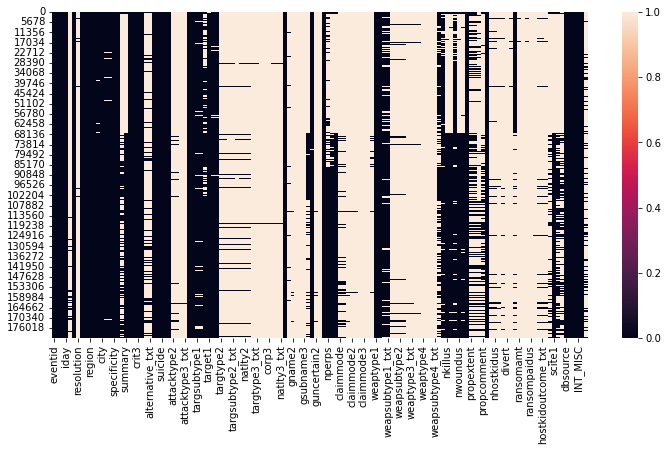

In [8]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull())

In [12]:
df.head()

,iyear,extended,country,country_txt,region,region_txt,provstate,city,specificity,vicinity,...,nwoundus,nwoundte,property,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1.0,0,...,NaN,NaN,0,0.0,0.0,PGIS,0,0,0,0
1,1970,0,130,Mexico,1,North America,Federal,Mexico city,1.0,0,...,NaN,NaN,0,1.0,1.0,PGIS,0,1,1,1
2,1970,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,4.0,0,...,NaN,NaN,0,0.0,0.0,PGIS,-9,-9,1,1
3,1970,0,78,Greece,8,Western Europe,Attica,Athens,1.0,0,...,NaN,NaN,1,0.0,0.0,PGIS,-9,-9,1,1
4,1970,0,101,Japan,4,East Asia,Fukouka,Fukouka,1.0,0,...,NaN,NaN,1,0.0,0.0,PGIS,-9,-9,1,1


In [13]:
df.extended.value_counts()

0    173452
1      8239
Name: extended, dtype: int64

In [5]:
df.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [11]:
df.country_txt.value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

In [12]:
df.suicide.value_counts()

0    175058
1      6633
Name: suicide, dtype: int64

In [7]:
new=df.groupby(['country_txt', 'iyear']).size().reset_index().rename(columns={0:'count'})

In [8]:
new

,country_txt,iyear,count
0,Afghanistan,1973,1
1,Afghanistan,1979,3
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10
...,...,...,...
3757,Zimbabwe,2010,1
3758,Zimbabwe,2011,1
3759,Zimbabwe,2013,3
3760,Zimbabwe,2014,1


<AxesSubplot:xlabel='iyear', ylabel='count'>

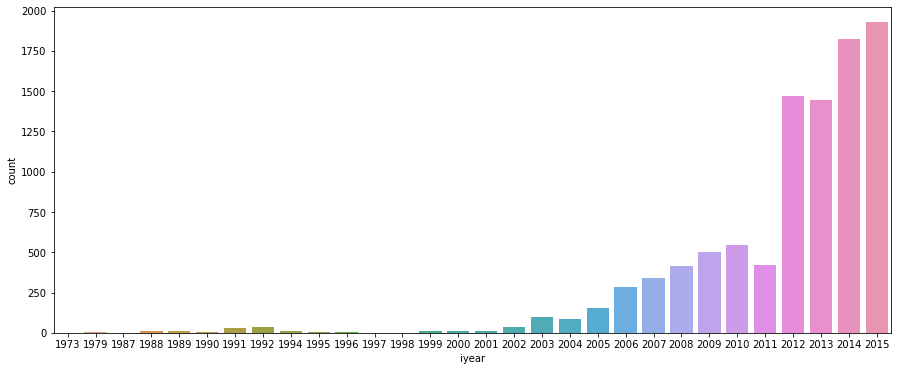

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot(x='iyear', y='count', data=new[:30])

<AxesSubplot:xlabel='country_txt', ylabel='count'>

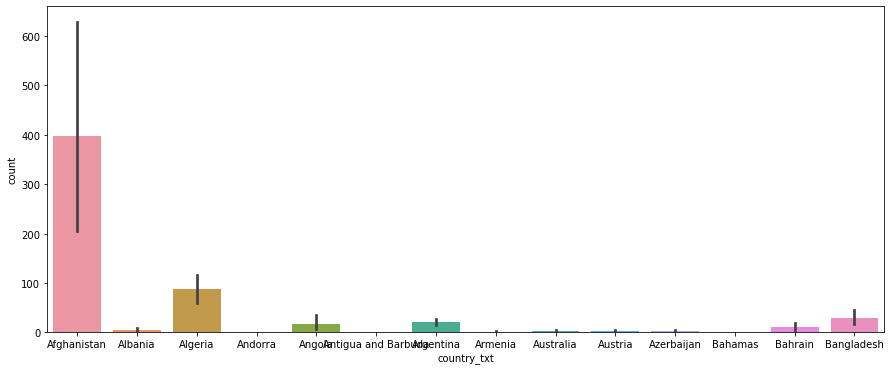

In [62]:
sns.barplot(x='country_txt', y='count', data=new[:300])

# Observations:
- Afghanistan is the most affected country due to terrorism
- 2015 was the worst affected year